In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
p=Path("dataset")

dirs=p.glob("*")


In [25]:
image_data=[]
labels=[]

labels_dict={"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon={0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

image_paths=[]

for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]    
    cnt=0
#     print(label +" is the label and dir is ",end=' ')
#     print(folder_dir)
    if label in labels_dict :
    #Iterate over folder_dir and pick all images of the pokemon
        for img_path in folder_dir.glob("*.jpg"):
            img=image.load_img(img_path,target_size=(40,40))
            img_array=image.img_to_array(img)
            image_data.append(img_array)
            labels.append(labels_dict[label])
            cnt+=1
        print("number of "+label+" are "+str(cnt))

number of Bulbasaur are 176
number of Meowth are 70
number of Pikachu are 199


Don't worry other images in directory are of .png type

# Visualisation

In [26]:
import numpy as np

In [29]:
print(len(image_data))
print(len(labels))

445
445


In [30]:
import random
random.seed(10)

In [31]:
X = np.array(image_data)
Y = np.array(labels)

Thus as a by above load_image and to_array ,we have no each image as 40*40*3 matrix

In [32]:
X.shape

(445, 40, 40, 3)

### Lets us see image before we normalise it
##### Though it will still be not that clear and cool 

In [33]:
import matplotlib.image as mpimg

In [41]:
X[0].shape

(40, 40, 3)

imshow() needs normalised image, thus we gave him X[0]/255, becasue normalization done as (x-min)/(max-min)

If u dont give it normalised data then it wouldn't show image

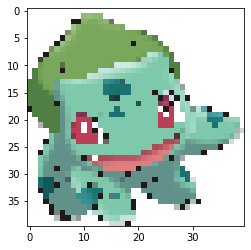

In [43]:
plt.imshow(X[0]/255)

In [44]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
#Normalisation
X = X/255.0

In [45]:
print(Y)

[0 2 0 0 2 1 0 0 1 2 0 2 1 0 0 1 1 0 0 2 1 1 2 2 2 0 0 0 1 0 2 0 1 1 1 0 1
 2 0 0 0 0 2 0 1 0 0 2 0 1 1 0 0 2 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 2 1 0 0 1 1 0 1 1 2 0 0 0 0 0 1 0 2 1 1 1 0 1 2 0 2 2 1 2 0 1 0 1
 1 2 1 1 0 0 2 1 0 1 0 1 1 2 0 1 2 1 2 0 2 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 2 1 2 0 1 2 1 2 0 0 1 2 2 1 1 0 0 2 1 1 0 0 1 1
 1 0 0 0 2 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1
 0 0 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 2 1 1 1 0
 0 2 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0
 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1
 1]


In [46]:
#Draw some Pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

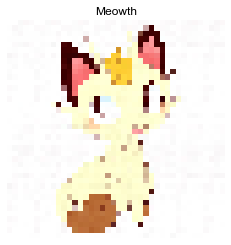

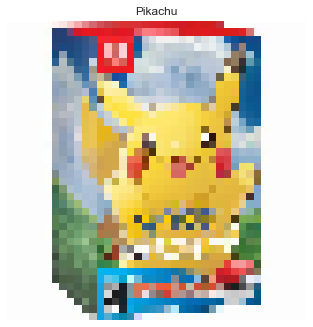

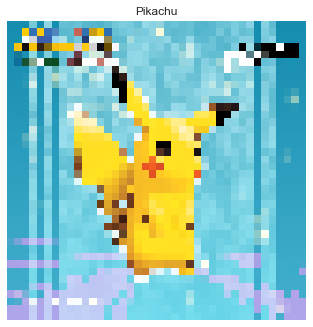

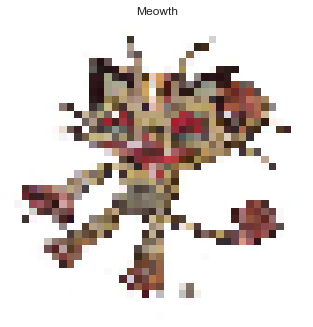

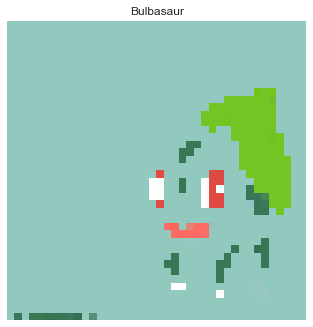

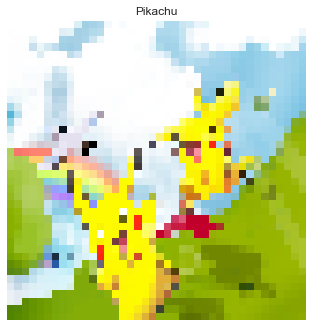

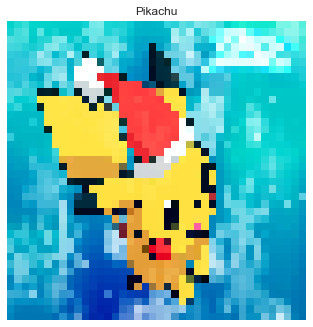

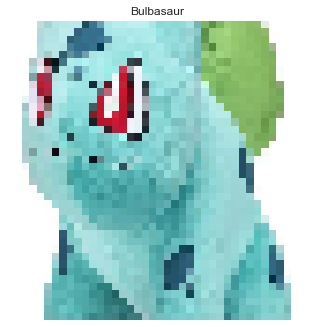

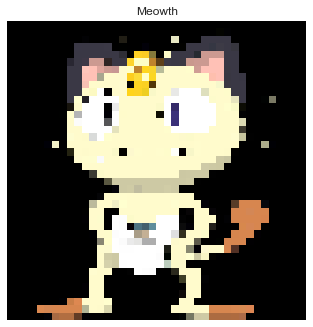

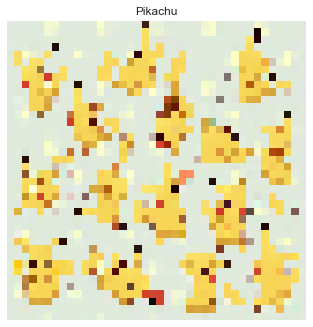

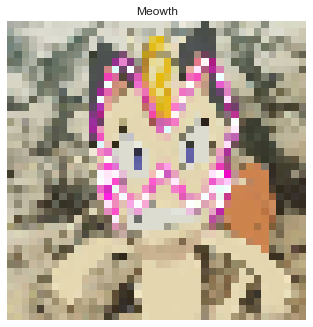

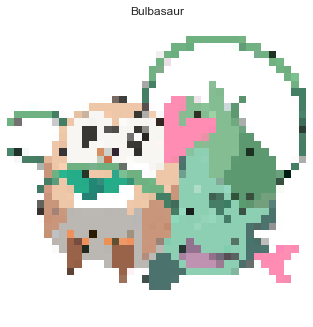

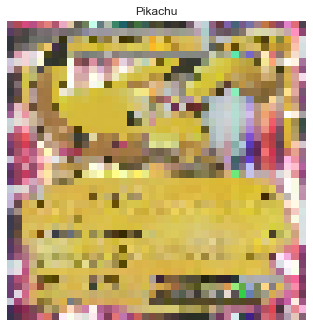

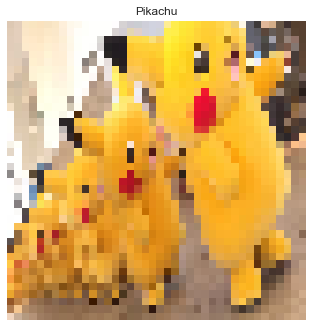

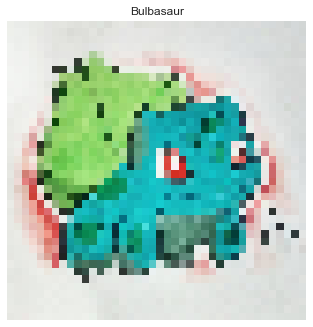

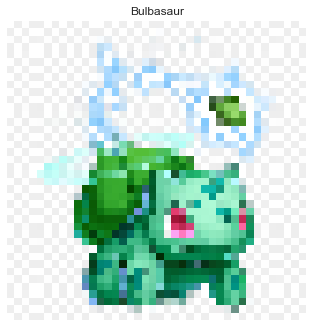

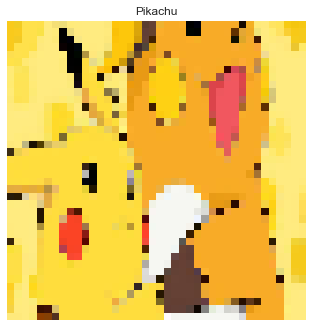

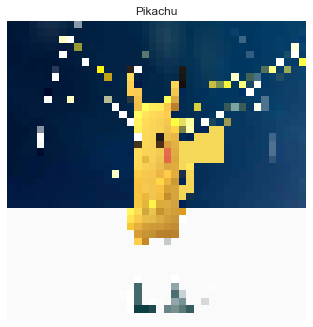

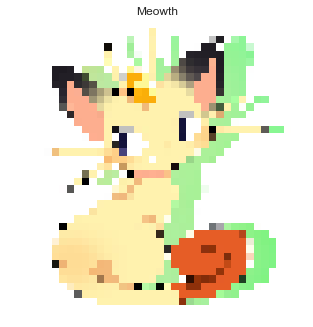

In [47]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i])  #4800 input units!


In [106]:
### Create Training and Testing Set
# 80 % data for train and then 20% for test
split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)


(356, 40, 40, 3) (356,)
(89, 40, 40, 3) (89,)


In [107]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [108]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [109]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [110]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)


In [111]:
print(X.shape)

(356, 40, 40, 3)


In [112]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)


(356, 4800)
(89, 4800)


In [113]:
l = train(X,Y,model,500,0.0002)


Epoch 0 Loss 3.1966
Epoch 50 Loss 0.3263
Epoch 100 Loss 0.1636
Epoch 150 Loss 0.0944
Epoch 200 Loss 0.0730
Epoch 250 Loss 0.0616
Epoch 300 Loss 0.0538
Epoch 350 Loss 0.0481
Epoch 400 Loss 0.0436
Epoch 450 Loss 0.0397


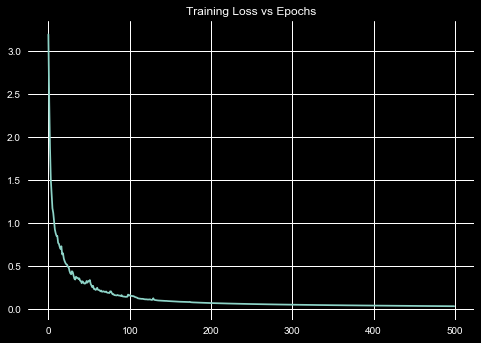

In [114]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()


In [172]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))


Train Acc 0.9831
Test Acc 0.6292


In [193]:
from sklearn.metrics import confusion_matrix
import itertools


In [194]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [195]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)


[[159   1   3]
 [  1 133   0]
 [  0   1  58]]


Confusion matrix, without normalization
[[159   1   3]
 [  1 133   0]
 [  0   1  58]]


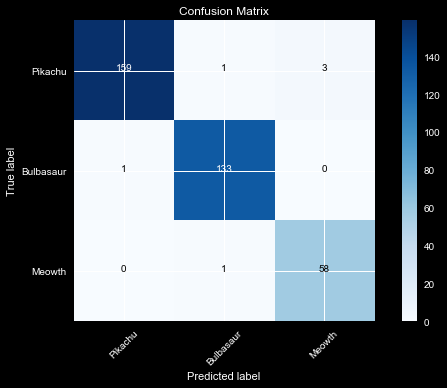

In [196]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [197]:
from sklearn.metrics import classification_report


In [198]:
print(classification_report(outputs,Y))


             precision    recall  f1-score   support

          0       0.99      0.98      0.98       163
          1       0.99      0.99      0.99       134
          2       0.95      0.98      0.97        59

avg / total       0.98      0.98      0.98       356



             precision    recall  f1-score   support

          0       0.72      0.67      0.69        42
          1       0.56      0.70      0.62        33
          2       0.56      0.36      0.43        14

avg / total       0.63      0.63      0.63        89

Confusion matrix, without normalization
[[28 12  2]
 [ 8 23  2]
 [ 3  6  5]]


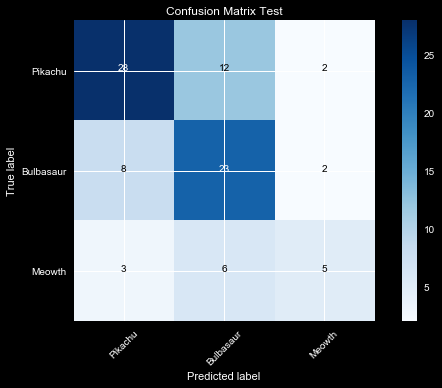

In [199]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")


# Visualise misclassifications

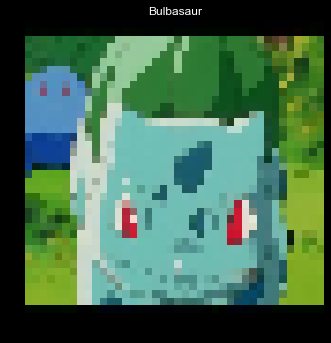

Prediction 67 Pikachu


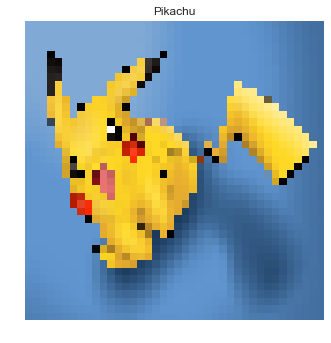

Prediction 125 Bulbasaur


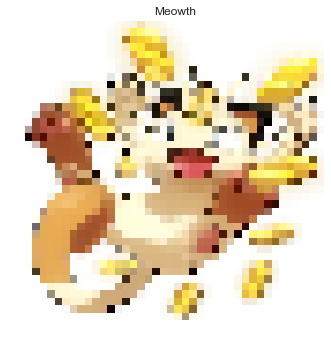

Prediction 129 Pikachu


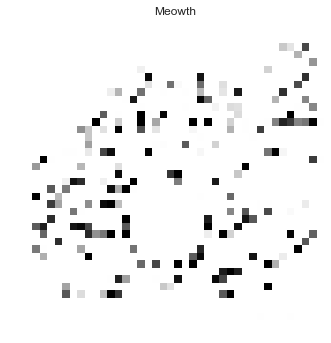

Prediction 212 Pikachu


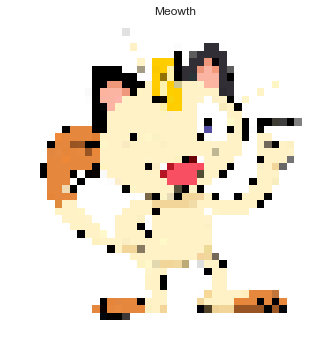

Prediction 213 Pikachu


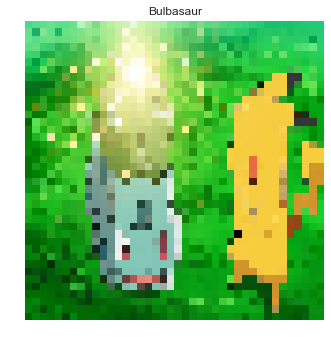

Prediction 312 Meowth


In [200]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))
